告诉我你去过那些省、直辖市、自治区、特区？


['山东', '陕西', '安徽', '江苏', '贵州', '黑龍江省', '北京', '青海', '河南', '天津', '广西壮族自治区', '福建', '湖南', '广东', '河北', '四川', '西藏自治区', '云南', '江西', '湖北', '宁夏回族自治区', '甘肃', '内蒙古自治区', '新疆维吾尔自治区', '海南', '重庆', '吉林', '浙江', '山西', '上海', '辽宁', '香港', '澳门', '台湾']
用空格将各个省名隔开，回车确认输入


浙江 辽宁 陕西 上海 安徽 山东 福建 江苏 广东 河南 湖北 山西


等着，给你画


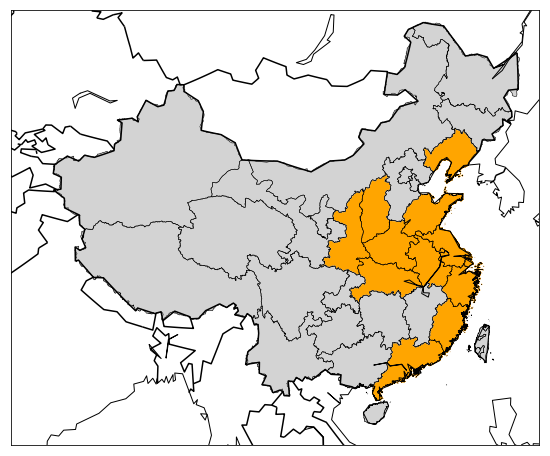

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon


def initMap():
    plt.figure(figsize=(16, 8))
    m = Basemap(
        llcrnrlon=77,
        llcrnrlat=14,
        urcrnrlon=140,
        urcrnrlat=51,
        projection='lcc',
        lat_1=33,
        lat_2=45,
        lon_0=100
    )
    m.drawcountries(linewidth=1.5)
    m.drawcoastlines()
#     m.drawrivers(linewidth=1.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=None)
#     m.drawlsmask(ocean_color='aqua',lakes=True)

    # 31个省、直辖市、自治区
    m.readshapefile('map_data/gadm36_CHN_1', 'states', drawbounds=True)
    # 香港
    m.readshapefile('map_data/gadm36_HKG_1', 'hongkong', drawbounds=True)
    # 澳门
    m.readshapefile('map_data/gadm36_MAC_1', 'macao', drawbounds=True)
    # 台湾
    m.readshapefile('map_data/gadm36_TWN_1', 'taiwan', drawbounds=True)
    return plt, m


class Map():

    def __init__(self):
        self.plt, self.m = initMap()

    def get_province_list(self):
        pl = []         # province_list
        for mm in self.m.states_info:
            nn = mm['NL_NAME_1'].split('|')
            pl.append(nn[1] if len(nn) > 1 else nn[0])
        pl = list(set(pl))
        pl.extend(['香港', '澳门', '台湾'])
        return pl

    def get_coordinate_list(self, pl):
        cl = []         # coordinate_list
        gcl = []        # gray
        for idx, mm in enumerate(self.m.states_info):
            nn = mm['NL_NAME_1'].split('|')
            name = nn[1] if len(nn) > 1 else nn[0]
            cl.append(self.m.states[idx]) if name in pl else gcl.append(
                self.m.states[idx])
        return cl, gcl

    def add_patch(self, item_l, color, enum=True):
        if enum:
            for nshape, seg in enumerate(item_l):
                poly = Polygon(seg, facecolor=color, edgecolor=color)
                self.ax.add_patch(poly)
        else:
            for seg in item_l:
                poly = Polygon(seg, facecolor=color, edgecolor=color)
                self.ax.add_patch(poly)

    # 小更一下，加一下灰度背景
    def draw(self, pl):
        cl, gcl = self.get_coordinate_list(pl)

        self.ax = self.plt.gca()

        self.add_patch(cl, 'orange', False)
        self.add_patch(gcl, 'lightgray', False)
        self.add_patch(self.m.hongkong, 'r' if '香港' in pl else 'lightgray')
        self.add_patch(self.m.macao, 'r' if '澳门' in pl else 'lightgray')
        self.add_patch(self.m.taiwan, 'r' if '台湾' in pl else 'lightgray')

        self.plt.show()


if __name__ == '__main__':
    m = Map()
    province_list = m.get_province_list()
    print('告诉我你去过那些省、直辖市、自治区、特区？')
    print('\n')
    print(province_list)
    print('用空格将各个省名隔开，回车确认输入')
    print('\n')

    args = input()
    print('\n')
    print('等着，给你画')
    pl = args.split(' ')
    m.draw(pl)


In [ ]:
# 浙江 辽宁 陕西 上海 安徽 山东 福建 江苏 广东 河南 湖北 山西

告诉我你去过那些地级市？


{'安庆市': '安徽', '蚌埠市': '安徽', '亳州市': '安徽', '巢湖市': '安徽', '池州市': '安徽', '滁州市': '安徽', '阜阳市': '安徽', '合肥市': '安徽', '淮北市': '安徽', '淮南市': '安徽', '黄山市': '安徽', '六安市': '安徽', '马鞍山市': '安徽', '宿州市': '安徽', '铜陵市': '安徽', '芜湖市': '安徽', '宣城市': '安徽', '北京': '北京', '重慶': '重庆', '福州市': '福建', '龙岩市': '福建', '南平市': '福建', '宁德市': '福建', '莆田市': '福建', '泉州市': '福建', '三明市': '福建', '厦门市': '福建', '漳州市': '福建', '白银市': '甘肃', '定西市': '甘肃', '甘南藏族自治州': '甘肃', '嘉峪关市': '甘肃', '金昌市': '甘肃', '酒泉市': '甘肃', '兰州市': '甘肃', '临夏回族自治州': '甘肃', '陇南市': '甘肃', '平凉市': '甘肃', '庆阳市': '甘肃', '天水市': '甘肃', '武威市': '甘肃', '张掖市': '甘肃', '潮州市': '广东', '东莞市': '广东', '佛山市': '广东', '广州市': '广东', '河源市': '广东', '惠州市': '广东', '江门市': '广东', '揭阳市': '广东', '茂名市': '广东', '梅州市': '广东', '清远市': '广东', '汕头市': '广东', '汕尾市': '广东', '韶关市': '广东', '深圳市': '广东', '阳江市': '广东', '云浮市': '广东', '湛江市': '广东', '肇庆市': '广东', '中山市': '广东', '珠海市': '广东', '百色市': '广西壮族自治区', '北海市': '广西壮族自治区', '崇左市': '广西壮族自治区', '防城港市': '广西壮族自治区', '贵港市': '广西壮族自治区', '桂林市': '广西壮族自治区', '河池市': '广西壮族自治区', '贺州市': '广西壮族自治区', '来宾市': '广西壮族

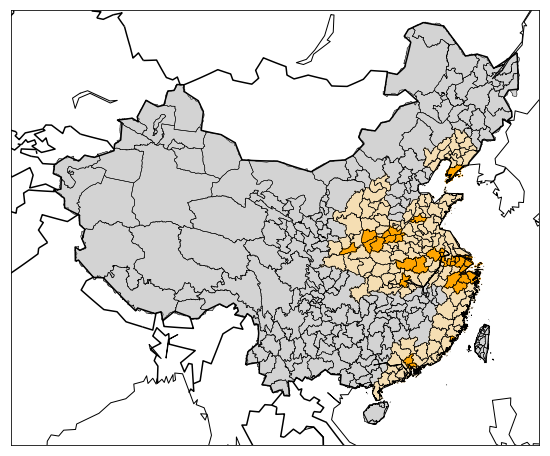

In [4]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon


def initMap():
    plt.figure(figsize=(16, 8))
    m = Basemap(
        llcrnrlon=77,
        llcrnrlat=14,
        urcrnrlon=140,
        urcrnrlat=51,
        projection='lcc',
        lat_1=33,
        lat_2=45,
        lon_0=100
    )
    m.drawcountries(linewidth=1.5)
    m.drawcoastlines()
#     m.drawrivers(linewidth=1.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=None)
#     m.drawlsmask(ocean_color='aqua',lakes=True)

    # 31个省、直辖市、自治区
    m.readshapefile('map_data/gadm36_CHN_2', 'states', drawbounds=True)
    # 香港
    m.readshapefile('map_data/gadm36_HKG_1', 'hongkong', drawbounds=True)
    # 澳门
    m.readshapefile('map_data/gadm36_MAC_1', 'macao', drawbounds=True)
    # 台湾
    m.readshapefile('map_data/gadm36_TWN_2', 'taiwan', drawbounds=True)
    return plt, m


class Map():

    def __init__(self):
        self.plt, self.m = initMap()

    def get_province_list(self):
        pl = []         # province_list
        for mm in self.m.states_info:
            nn = mm['NL_NAME_1'].split('|')
            pl.append(nn[1] if len(nn) > 1 else nn[0])
        pl = list(set(pl))
        pl.extend(['香港', '澳门', '台湾'])
        return pl
    
    def get_city_list(self):
        citys = []
        for mm in self.m.states_info:
            city = mm['NL_NAME_2'].split('|')[0]
            citys.append(city)
        citys = list(set(citys))    
        citys.extend(['重庆','香港', '澳门', '台湾'])
        return citys
    
    def get_coordinate_list(self, pl, province):
        cl = []         # coordinate_list
        gcl = []        # gray
        for idx, mm in enumerate(self.m.states_info):
            nn = mm['NL_NAME_1'].split('|')
            name = nn[1] if len(nn) > 1 else nn[0]
            if name in province:
                cl.append(self.m.states[idx]) if name in pl else gcl.append(
                    self.m.states[idx])
        return cl, gcl

    def get_coordinate_city(self, pl):
        cl = []         # coordinate_list
        gcl = []        # gray
        for idx, mm in enumerate(self.m.states_info):
            name = mm['NL_NAME_2'].split('|')[0]
#             name = nn[1] if len(nn) > 1 else nn[0]
            cl.append(self.m.states[idx]) if name in pl else gcl.append(
                self.m.states[idx])
        return cl, gcl

    def add_patch(self, item_l, color, enum=True):
        if enum:
            for nshape, seg in enumerate(item_l):
                poly = Polygon(seg, facecolor=color, edgecolor=color)
                self.ax.add_patch(poly)
        else:
            for seg in item_l:
                poly = Polygon(seg, facecolor=color, edgecolor=color)
                self.ax.add_patch(poly)

    # 小更一下，加一下灰度背景
    def draw(self, pl):
        cl, gcl = self.get_coordinate_city(pl)
        province = list(set(citys[i] for i in pl))
        print (province)
        prol, gprol = self.get_coordinate_list(pl,province)
        
        self.ax = self.plt.gca()
        
        self.add_patch(gcl, 'lightgray', False)
        self.add_patch(gprol, 'wheat', False)
        self.add_patch(cl, 'orange', False)

        
        self.add_patch(self.m.hongkong, 'r' if '香港' in pl else 'lightgray')
        self.add_patch(self.m.macao, 'r' if '澳门' in pl else 'lightgray')
        self.add_patch(self.m.taiwan, 'r' if '台湾' in pl else 'lightgray')

        self.plt.show()


if __name__ == '__main__':
    citys = json.loads(open("citys.json").read(),encoding="utf-8")
    
#     city_list = m.get_city_list()
    print('告诉我你去过那些地级市？')
    print('\n')
    print(citys)
    print('用空格将各个地名隔开，回车确认输入')
    print('\n')

    args = input()
    print('\n')
    print('等着，给你画')
    
    m = Map()
    pl = args.split(' ')
    m.draw(pl)


In [ ]:
三门峡市 洛阳市 郑州市 开封市 新乡市 焦作市 信阳市 运城县 上海 大连市 武汉市 西安市 厦门市 广州市 东莞市 杭州市 嘉兴市 金华市 宁波市 绍兴市 泰安市 六安市 滁州市 南京市 苏州市 无锡市 常州市